In [1]:
# From sklearn.datasets load digits dataset and do following

# Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
# Plot confusion matrix
# Plot classification report
# Solution link

In [90]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics

In [92]:
import seaborn as sns

In [5]:
digits = load_digits()

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
df_digits = digits.data

In [9]:
df_digits.shape

(1797, 64)

In [10]:
df_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

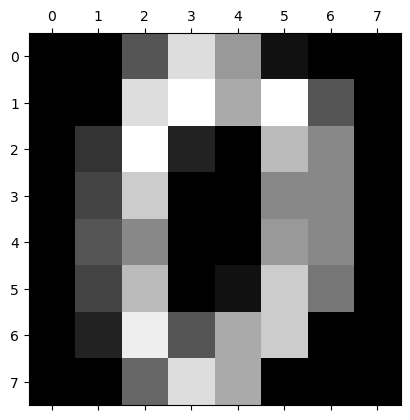

In [12]:
plt.gray()
plt.matshow(digits.images[0])

In [80]:
X = df_digits
y = digits.target

In [81]:
X.shape

(1797, 64)

In [82]:
y.shape

(1797,)

### train_test_split

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [84]:
X_train

array([[ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 13., 12.,  2.],
       ...,
       [ 0.,  0.,  7., ..., 13.,  2.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.]])

In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
classifier.score(X_train, y_train)

0.988169798190675

## Analisng the accuracy by increasing the number of K

In [95]:
y_pred = classifier.predict(X_test)

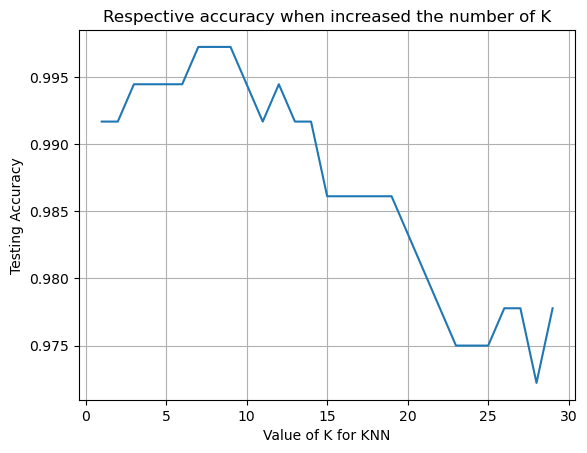

In [97]:
scores = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
data = {'range': list(range(1,30)), 'scores': scores} 
df1 = pd.DataFrame(data)
sns.lineplot(data=df1, x='range', y='scores')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Respective accuracy when increased the number of K")
plt.grid(True)
plt.show()

## confusion matrix

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  0  0  1  0  0  0]
 [ 0  0 35  0  0  0  0  1  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  1  1  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  3  0 31]]


0.9777777777777777

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.97      0.97        35
           2       0.97      0.97      0.97        36
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.99        38
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.99        37
           7       0.90      1.00      0.95        37
           8       1.00      0.93      0.96        29
           9       1.00      0.91      0.95        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

